In [ ]:
# 📦 Import necessary libraries for text preprocessing, model training, and evaluation in a text classification task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import string


In [ ]:
# 📄 Load the Twitter sentiment dataset, select relevant columns, and rename them for clarity

data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
data = data[['tweet', 'label']]
data.columns = ['review', 'sentiment']

print(" Dataset preview:")
display(data.head())


 Dataset preview:


,review,sentiment
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [ ]:
# 🧹 Preprocess the text data by removing URLs, mentions, hashtags, punctuation, numbers, and converting to lowercase

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @ and #
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.strip()
    return text

data['clean_review'] = data['review'].apply(preprocess_text)


In [ ]:
# ✂️ Split the cleaned text data and labels into training and testing sets for model training and evaluation

X = data['clean_review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 🧠 Convert text data to TF-IDF vectors and train a Logistic Regression model for text classification

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()


 Accuracy Score: 0.9496324104489285

 Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5937
    Positive       0.92      0.32      0.48       456

    accuracy                           0.95      6393
   macro avg       0.93      0.66      0.73      6393
weighted avg       0.95      0.95      0.94      6393


 Confusion Matrix:


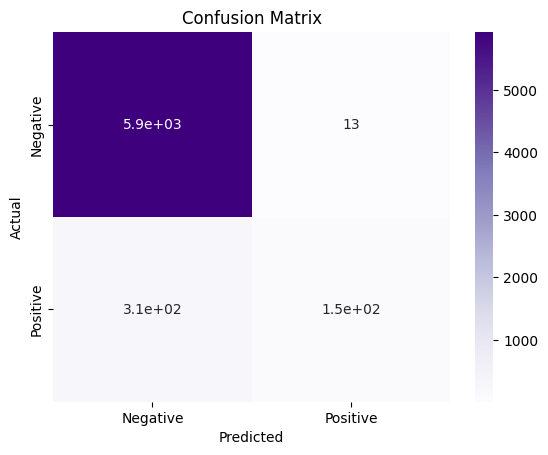

In [ ]:
# 📊 Evaluate the trained Logistic Regression model using accuracy, classification report, and a heatmap of the confusion matrix

y_pred = model.predict(X_test_vec)

print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
